#  PROJECT: BUILDING A SIMPLE LINEAR REGRESSION MODEL FOR HOUSE PRICE PREDICTION

**STEP1 : Importing Libraries**

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


**STEP2: Loading the data**

In [47]:
x=np.array([1,2]) #size of house in 1000 sqft unit
y=np.array([300,500]) #price of house in 1000 dollars

**STEP:3 Visualize your data**

In [ ]:
plt.scatter(x, y, marker='x', c='r')
# Set the title
plt.title("size of house vs. Price")
# Set the y-axis label
plt.ylabel('Price in dollar')
# Set the x-axis label
plt.xlabel('house size in sqft')
plt.show()

**Number Of Training Examples**

In [49]:
m=len(x)

**STEP 4:BUILDING A LINEAR REGRESSION MODEL**

**3 steps:**

       1) compute cost

       2)comute gradient

       3)run gradient descent


1)compute cost

In [50]:
def cost_computation(x,y,w,b):
  final_cost=0
  cost_sum=0
  for i in range(m):
    f_wb=w*x[i]+b
    cost=(f_wb-y[i])**2
    cost_sum = cost_sum+cost
  final_cost=cost_sum * (1/(2*m))
  return final_cost

 2)compute gradient

In [51]:
def gradient_computation(x,y,w,b):
  dj_dw=0
  dj_db=0
  for i in range(m):
    f_wb=w*x[i] + b
    dj_dw_i=(f_wb-y[i])*x[i]
    dj_db_i=f_wb-y[i]
    dj_dw=dj_dw+dj_dw_i
    dj_db=dj_db+dj_db_i
  dj_dw=dj_dw/m
  dj_db=dj_db/m
  return dj_dw,dj_db


 3) Compute grdaient descent

In [53]:
def gradient_descent(x,y,w_init,b_init,alpha,no_of_iters,cost_function,gradient_function):
  w=w_init
  b=b_init
  j_hist=[]
  p_hist=[]
  for i in range(no_of_iters):
    dj_dw,dj_db=gradient_function(x,y,w,b)
    w = w-alpha*dj_dw
    b = b-alpha*dj_db
    if i<100000:
      j_hist.append(cost_function(x,y,w,b))
      p_hist.append([w,b])
    if i % math.ceil(no_of_iters/10)== 0:
      print(f"Iteration {i:4}:",f"Cost: {j_hist[-1]:0.2e}", f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e} ", f"w: {w: 0.3e}, b:{b:0.5e}")
  return w,b,j_hist,p_hist



**STEP 5: Running The Gradient Descent**

In [ ]:
w_init=0
b_init=0
iterations=1000
temp_alpha=10e-2
w_final,b_final,j_hist,p_hist=gradient_descent(x,y,w_init,b_init,temp_alpha,iterations,cost_computation,gradient_computation)
print(f"(w,b) found by gradient descent:({w_final},{b_final})")

**STEP 6: Plotting Our Model**

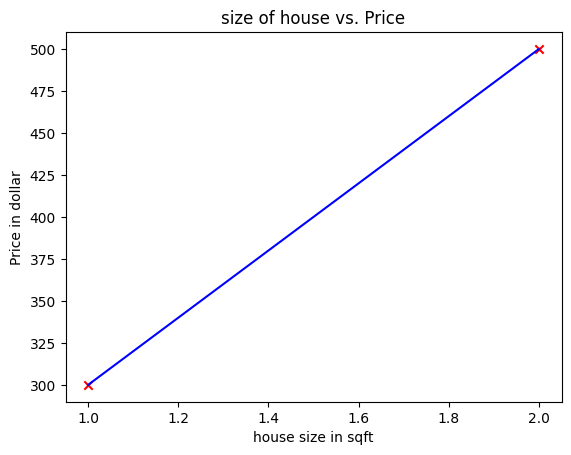

In [57]:
m = x.shape[0]
predicted = np.zeros(m)
for i in range(m):
    predicted[i] = w_final * x[i] + b_final

# Plot the linear fit
plt.plot(x, predicted, c = "b")
# Create a scatter plot of the data.
plt.scatter(x, y, marker='x', c='r')
# Set the title
plt.title("size of house vs. Price")
# Set the y-axis label
plt.ylabel('Price in dollar')
# Set the x-axis label
plt.xlabel('house size in sqft')
plt.show()

**STEP 7: Final Prediction**

In [ ]:
print(f" for 1000sqft house, price is {w_final*1.0 + b_final:0.1f}thousand dollars")
